In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
train_df=pd.read_csv("stock_prices.csv")
train_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


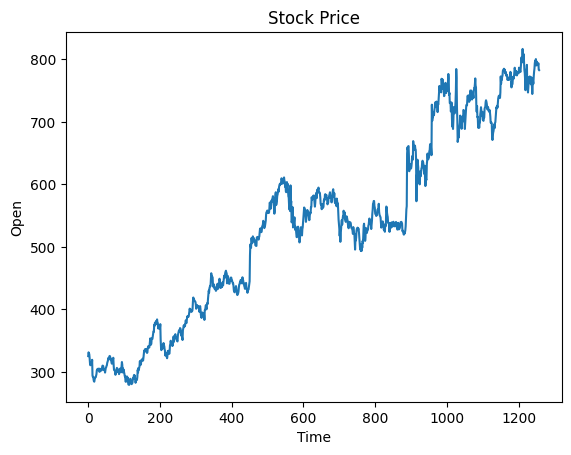

In [3]:
data = train_df.loc[:,["Open"]].values
print(data)

plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Open")
plt.title("Stock Price")
plt.show()

In [4]:
train = train_df.iloc[:, 1:2].values
len(train)

1258

In [5]:
scale = MinMaxScaler(feature_range=(0,1))
train_scaled = scale.fit_transform(train)

In [6]:
x_train = []
y_train = []

for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [10]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [11]:
model.fit(x_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 15s 117ms/step - loss: 0.0357
Epoch 2/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0046
Epoch 13/100
3

In [12]:
test_df = pd.read_csv("stock_prices.csv")
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [13]:
stock_price = test_df.iloc[:, 1:2].values

In [14]:
total_df = pd.concat((train_df['Open'], test_df['Open']), axis = 0)
inputs = total_df[len(total_df) - len(test_df) -  60:].values
inputs = inputs.reshape(-1, 1)
inputs = scale.transform(inputs)

C:\Users\pathu\AppData\Local\Temp\ipykernel_11920\3998103066.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = total_df[len(total_df) - len(test_df) -  60:].values


In [15]:
x_test = []

for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

40/40 [==============================] - 8s 73ms/step


array([[0.9217453 ],
       [0.74397445],
       [0.52897507],
       ...,
       [0.93006766],
       [0.9312495 ],
       [0.927143  ]], dtype=float32)

In [17]:
predicted_stock_price = scale.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[774.6134 ],
       [679.0509 ],
       [563.4758 ],
       ...,
       [779.08716],
       [779.7225 ],
       [777.51495]], dtype=float32)

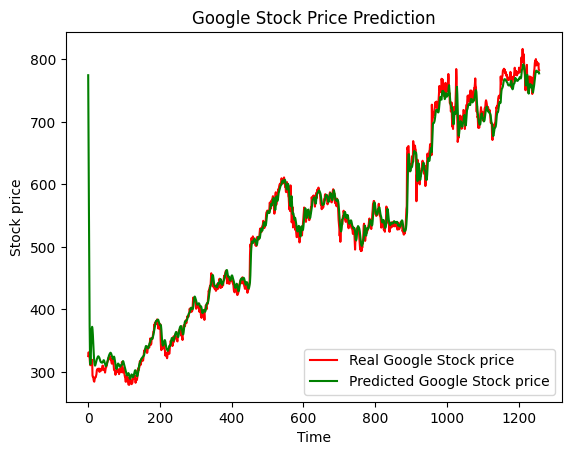

In [18]:
plt.plot(stock_price, color = 'red', label = 'Real Google Stock price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [19]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(stock_price, predicted_stock_price))

In [20]:
print(f"Mean square error : {rmse}")

Mean square error : 22.10353572181104
